<a href="https://colab.research.google.com/github/karen-chung/dissertation/blob/main/frcstComb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.kdnuggets.com/2020/07/r-squared-predictive-capacity-statistical-adequacy.html#:~:text=In%20neither%20of%20these%20cases,the%20predictive%20capacity%20of%20the

## Libraries & Dependencies

In [ ]:
#import matplotlib as mpl
#print(mpl.get_cachedir())

/Users/karenchung/.matplotlib


In [3]:
!pip install scikit-learn
!pip install neuralforecast

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [4]:
!pip install pandas matplotlib seaborn numpy

In [5]:
!pip install tensorflow

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
import numpy as np


from neuralforecast import NeuralForecast
from neuralforecast.models import PatchTST
from sklearn.metrics import accuracy_score
from neuralforecast.losses.pytorch import GMM, DistributionLoss, MAE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.saving import load_model

import tensorflow as tf
import random
import os

# Adjust the display setting to show all columns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Load Turbine Dataframes

In [7]:
impCols = ['# Date and time', 'Wind speed (m/s)', 'Long Term Wind (m/s)', 'Wind direction (°)', 'Nacelle position (°)', 'Vane position 1+2 (°)', 'Energy Export (kWh)', 'Energy Import (kWh)', 'Lost Production Total (kWh)', 'Power (kW)',
           'Reactive power (kvar)', 'Front bearing temperature (°C)', 'Rear bearing temperature (°C)', 'Stator temperature 1 (°C)', 'Nacelle ambient temperature (°C)', 'Nacelle temperature (°C)', 'Transformer temperature (°C)',
           'CPU temperature (°C)', 'Grid voltage (V)', 'Grid current (A)', 'Rotor speed (RPM)', 'Gearbox speed (RPM)', 'Yaw bearing angle (°)', 'Grid frequency (Hz)', 'Production Factor', 'Performance Index',
           'Investment Performance Ratio', 'Operating Performance Ratio', 'Metal particle count', 'Apparent power (kVA)' , 'Generator RPM (RPM)'] #

In [13]:
from google.colab import files

# This will open a file upload dialog where you can select your CSV file
uploaded = files.upload()

Saving Turbine_Data_Kelmarsh_1_2022-01-01_-_2023-01-01_228.csv to Turbine_Data_Kelmarsh_1_2022-01-01_-_2023-01-01_228.csv
Saving Turbine_Data_Kelmarsh_2_2022-01-01_-_2023-01-01_229.csv to Turbine_Data_Kelmarsh_2_2022-01-01_-_2023-01-01_229.csv
Saving Turbine_Data_Kelmarsh_3_2022-01-01_-_2023-01-01_230.csv to Turbine_Data_Kelmarsh_3_2022-01-01_-_2023-01-01_230.csv
Saving Turbine_Data_Kelmarsh_4_2022-01-01_-_2023-01-01_231.csv to Turbine_Data_Kelmarsh_4_2022-01-01_-_2023-01-01_231.csv
Saving Turbine_Data_Kelmarsh_5_2022-01-01_-_2023-01-01_232.csv to Turbine_Data_Kelmarsh_5_2022-01-01_-_2023-01-01_232.csv
Saving Turbine_Data_Kelmarsh_6_2022-01-01_-_2023-01-01_233.csv to Turbine_Data_Kelmarsh_6_2022-01-01_-_2023-01-01_233.csv


In [14]:
dfTRB1 = pd.read_csv('Turbine_Data_Kelmarsh_1_2022-01-01_-_2023-01-01_228.csv', skiprows=9, usecols=impCols)
dfTRB2 = pd.read_csv('Turbine_Data_Kelmarsh_2_2022-01-01_-_2023-01-01_229.csv', skiprows=9, usecols=impCols)
dfTRB3 = pd.read_csv('Turbine_Data_Kelmarsh_3_2022-01-01_-_2023-01-01_230.csv', skiprows=9, usecols=impCols)
dfTRB4 = pd.read_csv('Turbine_Data_Kelmarsh_4_2022-01-01_-_2023-01-01_231.csv', skiprows=9, usecols=impCols)
dfTRB5 = pd.read_csv('Turbine_Data_Kelmarsh_5_2022-01-01_-_2023-01-01_232.csv', skiprows=9, usecols=impCols)
dfTRB6 = pd.read_csv('Turbine_Data_Kelmarsh_6_2022-01-01_-_2023-01-01_233.csv', skiprows=9, usecols=impCols)

In [15]:
dfTRB1.isna().sum()

# Date and time                        0
Wind speed (m/s)                     554
Long Term Wind (m/s)                   0
Wind direction (°)                   550
Nacelle position (°)                 550
Vane position 1+2 (°)                593
Energy Export (kWh)                    6
Energy Import (kWh)                   67
Lost Production Total (kWh)            0
Power (kW)                           550
Reactive power (kvar)                550
Front bearing temperature (°C)       593
Rear bearing temperature (°C)        593
Stator temperature 1 (°C)            550
Nacelle ambient temperature (°C)     593
Nacelle temperature (°C)             593
Transformer temperature (°C)         593
CPU temperature (°C)                 550
Grid voltage (V)                     550
Grid current (A)                     550
Rotor speed (RPM)                    550
Generator RPM (RPM)                  550
Gearbox speed (RPM)                  550
Yaw bearing angle (°)                593
Grid frequency (Hz)                  550
Production Factor                      0
Performance Index                   2235
Investment Performance Ratio           0
Operating Performance Ratio         8027
Apparent power (kVA)                 550
Metal particle count                   0
dtype: int64

In [16]:
tarTurbine = 'Power (kW) Turbine_4'

## Data Preprocessing & Feature Engineering

### Combine Turbine Dataset

In [17]:
def combine_wind_turbine_data(dfs, turbine_names, datetime_col="# Date and time"):
    """
    Combines multiple dataframes from different wind turbines, renaming the columns dynamically
    to reflect the specific turbine, except for the datetime column.

    Parameters:
    - dfs: List of pandas DataFrames from different turbines.
    - turbine_names: List of turbine names corresponding to each DataFrame.
    - datetime_col: The name of the datetime column that should remain common.

    Returns:
    - combined_df: A single DataFrame with dynamically renamed columns.
    """
    # Create a list to store the renamed DataFrames
    renamed_dfs = []

    for df, turbine_name in zip(dfs, turbine_names):
        # Rename columns except for the datetime column
        renamed_df = df.rename(columns={col: f"{col} {turbine_name}" if col != datetime_col else col for col in df.columns})
        renamed_dfs.append(renamed_df)

    # Merge all DataFrames on the datetime column
    combined_df = pd.concat(renamed_dfs, axis=1)

    # Drop duplicate datetime columns if they exist after merging
    combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]

    return combined_df

turbine_names = ["Turbine_1", "Turbine_2", "Turbine_3", "Turbine_4", "Turbine_5", "Turbine_6"]
comb_DF_TRB = combine_wind_turbine_data([dfTRB1, dfTRB2, dfTRB3, dfTRB4, dfTRB5, dfTRB6], turbine_names)

In [18]:
comb_DF_TRB.shape

(52560, 181)

In [19]:
comb_DF_TRB.head()

# Date and time  Wind speed (m/s) Turbine_1  \
0  2022-01-01 00:00:00                    6.781222   
1  2022-01-01 00:10:00                    6.936052   
2  2022-01-01 00:20:00                    7.294642   
3  2022-01-01 00:30:00                    8.080467   
4  2022-01-01 00:40:00                    7.021328   

   Long Term Wind (m/s) Turbine_1  Wind direction (°) Turbine_1  \
0                            7.21                    185.795348   
1                            7.21                    189.458687   
2                            7.21                    188.648729   
3                            7.21                    188.826550   
4                            7.21                    191.252213   

   Nacelle position (°) Turbine_1  Vane position 1+2 (°) Turbine_1  \
0                      193.731354                        -9.971973   
1                      193.731354                        -6.699598   
2                      193.731354                        -4.183767   
3                      193.731354                        -6.108515   
4                      193.731354                        -1.088158   

   Energy Export (kWh) Turbine_1  Energy Import (kWh) Turbine_1  \
0                          126.0                       0.001887   
1                          116.0                       0.001887   
2                          122.0                       0.001887   
3                          211.0                       0.001887   
4                          136.0                       0.001887   

   Lost Production Total (kWh) Turbine_1  Power (kW) Turbine_1  \
0                              10.818564            630.889598   
1                             -11.235055            809.339449   
2                              -5.118643            893.607333   
3                              26.933563            995.583734   
4                             -26.360199            926.519441   

   Reactive power (kvar) Turbine_1  Front bearing temperature (°C) Turbine_1  \
0                      -190.507286                                 73.852499   
1                      -235.626105                                 73.087500   
2                      -222.190602                                 72.187499   
3                      -240.734678                                 72.530000   
4                      -287.214456                                 73.570000   

   Rear bearing temperature (°C) Turbine_1  \
0                                70.157500   
1                                69.632499   
2                                68.932501   
3                                68.994999   
4                                69.842501   

   Stator temperature 1 (°C) Turbine_1  \
0                            63.590000   
1                            64.622500   
2                            65.120000   
3                            65.405000   
4                            62.717499   

   Nacelle ambient temperature (°C) Turbine_1  \
0                                     12.4775   
1                                     12.4925   
2                                     12.5225   
3                                     12.5700   
4                                     12.5925   

   Nacelle temperature (°C) Turbine_1  Transformer temperature (°C) Turbine_1  \
0                           25.227500                                 54.1125   
1                           23.595000                                 53.2575   
2                           22.265000                                 52.7100   
3                           19.335000                                 53.0875   
4                           18.670001                                 52.9425   

   CPU temperature (°C) Turbine_1  Grid voltage (V) Turbine_1  \
0                          56.375                  400.460632   
1                          57.075                  399.502464   
2                          57.800                  400.339539   
3    

In [20]:
comb_DF_TRB.columns.to_list()

['# Date and time',
 'Wind speed (m/s) Turbine_1',
 'Long Term Wind (m/s) Turbine_1',
 'Wind direction (°) Turbine_1',
 'Nacelle position (°) Turbine_1',
 'Vane position 1+2 (°) Turbine_1',
 'Energy Export (kWh) Turbine_1',
 'Energy Import (kWh) Turbine_1',
 'Lost Production Total (kWh) Turbine_1',
 'Power (kW) Turbine_1',
 'Reactive power (kvar) Turbine_1',
 'Front bearing temperature (°C) Turbine_1',
 'Rear bearing temperature (°C) Turbine_1',
 'Stator temperature 1 (°C) Turbine_1',
 'Nacelle ambient temperature (°C) Turbine_1',
 'Nacelle temperature (°C) Turbine_1',
 'Transformer temperature (°C) Turbine_1',
 'CPU temperature (°C) Turbine_1',
 'Grid voltage (V) Turbine_1',
 'Grid current (A) Turbine_1',
 'Rotor speed (RPM) Turbine_1',
 'Generator RPM (RPM) Turbine_1',
 'Gearbox speed (RPM) Turbine_1',
 'Yaw bearing angle (°) Turbine_1',
 'Grid frequency (Hz) Turbine_1',
 'Production Factor Turbine_1',
 'Performance Index Turbine_1',
 'Investment Performance Ratio Turbine_1',
 'Opera

<Axes: xlabel='# Date and time'>

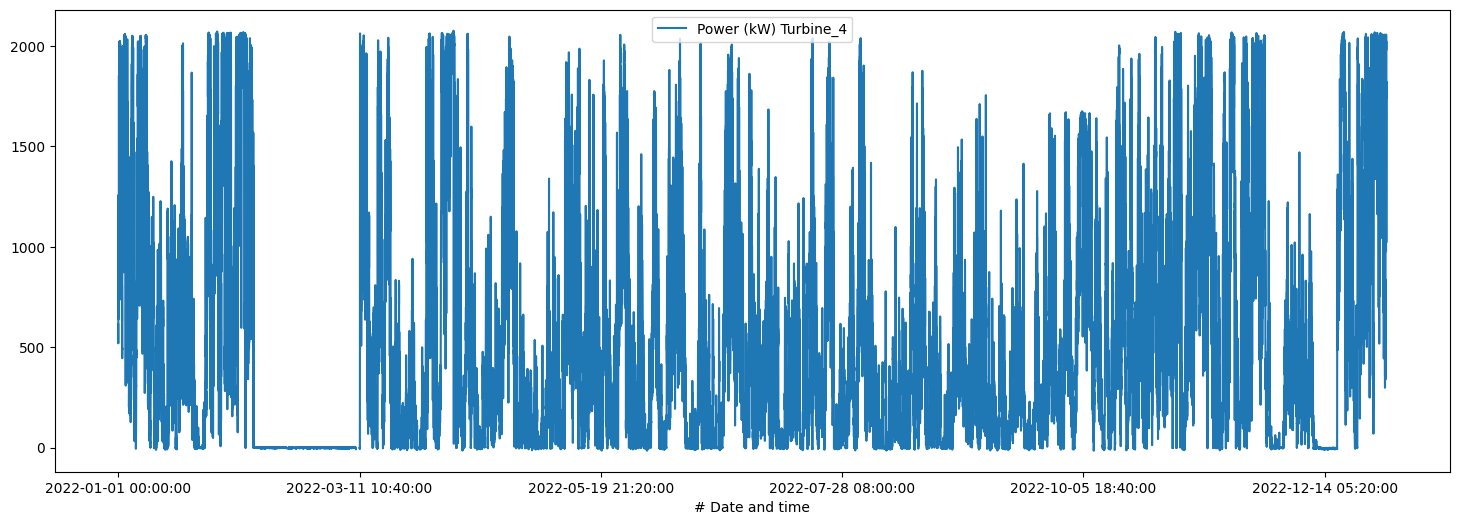

In [21]:
comb_DF_TRB.plot(x='# Date and time', y=tarTurbine, figsize=(18,6))

### Handle Missing Values

In [22]:
def handle_missing_values(df, option):
    """
    Handles missing values in a DataFrame based on the user's choice.

    Parameters:
    - df: The DataFrame containing the data.
    - option: Integer representing the user's choice:
      1 = Replace NaNs with mean
      2 = Replace NaNs with median
      3 = Replace NaNs with linear interpolation

    Returns:
    - df_filled: The DataFrame with missing values handled.
    """
    if option == 1:
        # Replace NaNs with the mean of each column
        df_filled = df.fillna(df.mean())
        print("NaNs have been replaced with the mean of each column.")
    elif option == 2:
        # Replace NaNs with the median of each column
        df_filled = df.fillna(df.median())
        print("NaNs have been replaced with the median of each column.")
    elif option == 3:
        # Replace NaNs with linear interpolation
        df_filled = df.interpolate(method='linear')
        print("NaNs have been replaced using linear interpolation.")
    else:
        raise ValueError("Invalid option. Please choose 1, 2, or 3.")

    return df_filled

option = 3  # User input for handling NaNs
comb_DF_TRB_Clnd = handle_missing_values(comb_DF_TRB, option)
comb_DF_TRB_Clnd.head()

<ipython-input-22-425df12c6dd7>:25: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df.interpolate(method='linear')


NaNs have been replaced using linear interpolation.


# Date and time  Wind speed (m/s) Turbine_1  \
0  2022-01-01 00:00:00                    6.781222   
1  2022-01-01 00:10:00                    6.936052   
2  2022-01-01 00:20:00                    7.294642   
3  2022-01-01 00:30:00                    8.080467   
4  2022-01-01 00:40:00                    7.021328   

   Long Term Wind (m/s) Turbine_1  Wind direction (°) Turbine_1  \
0                            7.21                    185.795348   
1                            7.21                    189.458687   
2                            7.21                    188.648729   
3                            7.21                    188.826550   
4                            7.21                    191.252213   

   Nacelle position (°) Turbine_1  Vane position 1+2 (°) Turbine_1  \
0                      193.731354                        -9.971973   
1                      193.731354                        -6.699598   
2                      193.731354                        -4.183767   
3                      193.731354                        -6.108515   
4                      193.731354                        -1.088158   

   Energy Export (kWh) Turbine_1  Energy Import (kWh) Turbine_1  \
0                          126.0                       0.001887   
1                          116.0                       0.001887   
2                          122.0                       0.001887   
3                          211.0                       0.001887   
4                          136.0                       0.001887   

   Lost Production Total (kWh) Turbine_1  Power (kW) Turbine_1  \
0                              10.818564            630.889598   
1                             -11.235055            809.339449   
2                              -5.118643            893.607333   
3                              26.933563            995.583734   
4                             -26.360199            926.519441   

   Reactive power (kvar) Turbine_1  Front bearing temperature (°C) Turbine_1  \
0                      -190.507286                                 73.852499   
1                      -235.626105                                 73.087500   
2                      -222.190602                                 72.187499   
3                      -240.734678                                 72.530000   
4                      -287.214456                                 73.570000   

   Rear bearing temperature (°C) Turbine_1  \
0                                70.157500   
1                                69.632499   
2                                68.932501   
3                                68.994999   
4                                69.842501   

   Stator temperature 1 (°C) Turbine_1  \
0                            63.590000   
1                            64.622500   
2                            65.120000   
3                            65.405000   
4                            62.717499   

   Nacelle ambient temperature (°C) Turbine_1  \
0                                     12.4775   
1                                     12.4925   
2                                     12.5225   
3                                     12.5700   
4                                     12.5925   

   Nacelle temperature (°C) Turbine_1  Transformer temperature (°C) Turbine_1  \
0                           25.227500                                 54.1125   
1                           23.595000                                 53.2575   
2                           22.265000                                 52.7100   
3                           19.335000                                 53.0875   
4                           18.670001                                 52.9425   

   CPU temperature (°C) Turbine_1  Grid voltage (V) Turbine_1  \
0                          56.375                  400.460632   
1                          57.075                  399.502464   
2                          57.800                  400.339539   
3    

In [23]:
comb_DF_TRB_Clnd.isna().sum()

# Date and time                               0
Wind speed (m/s) Turbine_1                    0
Long Term Wind (m/s) Turbine_1                0
Wind direction (°) Turbine_1                  0
Nacelle position (°) Turbine_1                0
Vane position 1+2 (°) Turbine_1               0
Energy Export (kWh) Turbine_1                 0
Energy Import (kWh) Turbine_1                 0
Lost Production Total (kWh) Turbine_1         0
Power (kW) Turbine_1                          0
Reactive power (kvar) Turbine_1               0
Front bearing temperature (°C) Turbine_1      0
Rear bearing temperature (°C) Turbine_1       0
Stator temperature 1 (°C) Turbine_1           0
Nacelle ambient temperature (°C) Turbine_1    0
Nacelle temperature (°C) Turbine_1            0
Transformer temperature (°C) Turbine_1        0
CPU temperature (°C) Turbine_1                0
Grid voltage (V) Turbine_1                    0
Grid current (A) Turbine_1                    0
Rotor speed (RPM) Turbine_1                   0
Generator RPM (RPM) Turbine_1                 0
Gearbox speed (RPM) Turbine_1                 0
Yaw bearing angle (°) Turbine_1               0
Grid frequency (Hz) Turbine_1                 0
Production Factor Turbine_1                   0
Performance Index Turbine_1                   0
Investment Performance Ratio Turbine_1        0
Operating Performance Ratio Turbine_1         0
Apparent power (kVA) Turbine_1                0
Metal particle count Turbine_1                0
Wind speed (m/s) Turbine_2                    0
Long Term Wind (m/s) Turbine_2                0
Wind direction (°) Turbine_2                  0
Nacelle position (°) Turbine_2                0
Vane position 1+2 (°) Turbine_2               0
Energy Export (kWh) Turbine_2                 0
Energy Import (kWh) Turbine_2                 0
Lost Production Total (kWh) Turbine_2         0
Power (kW) Turbine_2                          0
Reactive power (kvar) Turbine_2               0
Front bearing temperature (°C) Turbine_2      0
Rear bearing temperature (°C) Turbine_2       0
Stator temperature 1 (°C) Turbine_2           0
Nacelle ambient temperature (°C) Turbine_2    0
Nacelle temperature (°C) Turbine_2            0
Transformer temperature (°C) Turbine_2        0
CPU temperature (°C) Turbine_2                0
Grid voltage (V) Turbine_2                    0
Grid current (A) Turbine_2                    0
Rotor speed (RPM) Turbine_2                   0
Generator RPM (RPM) Turbine_2                 0
Gearbox speed (RPM) Turbine_2                 0
Yaw bearing angle (°) Turbine_2               0
Grid frequency (Hz) Turbine_2                 0
Production Factor Turbine_2                   0
Performance Index Turbine_2                   0
Investment Performance Ratio Turbine_2        0
Operating Performance Ratio Turbine_2         0
Apparent power (kVA) Turbine_2                0
Metal particle count Turbine_2                0
Wind speed (m/s) Turbine_3                    0
Long Term Wind (m/s) Turbine_3                0
Wind direction (°) Turbine_3                  0
Nacelle position (°) Turbine_3                0
Vane position 1+2 (°) Turbine_3               0
Energy Export (kWh) Turbine_3                 0
Energy Import (kWh) Turbine_3                 0
Lost Production Total (kWh) Turbine_3         0
Power (kW) Turbine_3                          0
Reactive power (kvar) Turbine_3               0
Front bearing temperature (°C) Turbine_3      0
Rear bearing temperature (°C) Turbine_3       0
Stator temperature 1 (°C) Turbine_3           0
Nacelle ambient temperature (°C) Turbine_3    0
Nacelle temperature (°C) Turbine_3            0
Transformer temperature (°C) Turbine_3        0
CPU temperature (°C) Turbine_3                0
Grid voltage (V) Turbine_3                    0
Grid current (A) Turbine_3                    0
Rotor speed (RPM) Turbine_3                   0
Generator RPM (RPM) Turbine_3                 0
Gearbox speed (RPM) Turbine_3                 0
Yaw bearing angl

## Feature Importance

### HEATMAP

In [24]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr = comb_DF_TRB_Clnd.select_dtypes('number').corr()
corr.style.background_gradient(cmap, axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_table_styles(magnify())

In [25]:
def get_high_correlation_columns(df, column_name, threshold=0.2):
    """
    Returns columns that have a correlation above or below the specified threshold with the given column.

    Parameters:
    - df: DataFrame containing the data.
    - column_name: The column with which to check correlations.
    - threshold: The correlation threshold (default is 0.2).

    Returns:
    - high_corr_columns: A dictionary with column names and their correlations.
    """
    # Calculate the correlation matrix for numerical columns
    corr_matrix = df.select_dtypes('number').corr()

    # Extract the correlation values for the specified column
    correlations = corr_matrix[column_name]

    # Filter columns with correlations above or below the specified threshold
    high_corr_columns = correlations[(correlations > threshold) | (correlations < -threshold)]

    # Convert to dictionary format
    high_corr_columns_dict = high_corr_columns.to_dict()

    return high_corr_columns_dict

threshold = 0.7
high_corr_columns_dict = get_high_correlation_columns(comb_DF_TRB_Clnd, tarTurbine, threshold=threshold)
high_corr_columns_dict

{'Energy Export (kWh) Turbine_1': 0.7156399710387749,
 'Power (kW) Turbine_1': 0.729528776998859,
 'Grid current (A) Turbine_1': 0.7306323029230307,
 'Investment Performance Ratio Turbine_1': 0.7240396284852593,
 'Apparent power (kVA) Turbine_1': 0.7319727691608483,
 'Wind speed (m/s) Turbine_2': 0.706884024791163,
 'Power (kW) Turbine_2': 0.7088092298552924,
 'Grid current (A) Turbine_2': 0.7072714619008956,
 'Apparent power (kVA) Turbine_2': 0.708502182707672,
 'Power (kW) Turbine_3': 0.7109114058163819,
 'Grid current (A) Turbine_3': 0.7178049337169171,
 'Investment Performance Ratio Turbine_3': 0.7043566334163367,
 'Apparent power (kVA) Turbine_3': 0.7190244582586804,
 'Wind speed (m/s) Turbine_4': 0.719830761602508,
 'Energy Export (kWh) Turbine_4': 0.980068567058525,
 'Power (kW) Turbine_4': 1.0,
 'Reactive power (kvar) Turbine_4': -0.9089366240166753,
 'Transformer temperature (°C) Turbine_4': 0.847311786219684,
 'Grid current (A) Turbine_4': 0.9990578618152948,
 'Rotor speed (R

### RANDOM FOREST

In [ ]:
# rfDF = comb_DF_TRB_Clnd.copy()
# rfDF = rfDF.drop(columns=['# Date and time'])  # Drop the 'Date' column

# # Separate features and target
# X = rfDF.drop(columns=[tarTurbine])
# y = rfDF[tarTurbine]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the feature data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
# rfDF.isna().sum()

In [ ]:
# print(rfDF.dtypes)

In [ ]:
# # Train a Random Forest classifier
# rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
# rf.fit(X_train_scaled, y_train)

# # Get feature importances
# importances = rf.feature_importances_
# feature_names = X.columns
# feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# # Sort the feature importances in descending order
# feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# # Print the feature importances
# print(feature_importances)

In [ ]:
# # Plot the feature importances
# plt.figure(figsize=(15, 15))
# plt.barh(feature_importances['Feature'], feature_importances['Importance'])
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importances from Random Forest Classifier')
# plt.gca().invert_yaxis()
# plt.show()

## Power (KW) Forecasting

### Global Option Selection

In [26]:
highCorrFeatList = list(high_corr_columns_dict.keys())

In [27]:
tsDF = comb_DF_TRB_Clnd[["# Date and time"] + highCorrFeatList].copy()

# Convert 'Date and time' column to datetime format
tsDF['# Date and time'] = pd.to_datetime(tsDF['# Date and time'])

# Get Last Month Data
tsDF = tsDF.tail(4464).reset_index(drop=True)

globalHorizon = 6                      # Change to Increase or Decrease Future Forecast Time Steps in 10 Min Interval
globalWindows = 6                      # Change to Increase or Decrease Cross Validation Folds
globalSeqLength = globalHorizon * 5    # Change to Increase or Decrease Sequence Length/Lookback Value

modelScores = {}

print(tsDF.shape)
tsDF.head()

(4464, 29)


# Date and time  Energy Export (kWh) Turbine_1  Power (kW) Turbine_1  \
0 2022-12-01 00:00:00                       0.067416             -1.172633   
1 2022-12-01 00:10:00                       0.067416             -0.788513   
2 2022-12-01 00:20:00                       0.067416             -0.562309   
3 2022-12-01 00:30:00                       0.067416             -3.082563   
4 2022-12-01 00:40:00                       0.067416             -2.141469   

   Grid current (A) Turbine_1  Investment Performance Ratio Turbine_1  \
0                    5.848833                               -0.001521   
1                    4.966583                               -0.001023   
2                    4.395583                               -0.000729   
3                    8.876491                               -0.003998   
4                    7.517778                               -0.002777   

   Apparent power (kVA) Turbine_1  Wind speed (m/s) Turbine_2  \
0                        1.152894                    1.807613   
1                        0.818389                    1.856062   
2                        0.563910                    1.959694   
3                        3.064424                    2.469431   
4                        2.173479                    2.767350   

   Power (kW) Turbine_2  Grid current (A) Turbine_2  \
0             -1.818702                    5.183917   
1             -2.220961                    5.768333   
2             -1.176901                    4.657250   
3             -2.479175                    6.387833   
4             -2.401817                    6.422833   

   Apparent power (kVA) Turbine_2  Power (kW) Turbine_3  \
0                        1.858714             -3.319437   
1                        2.222561             -2.881434   
2                        1.160896             -4.198112   
3                        2.481309             -3.704625   
4                        2.404485             -4.205581   

   Grid current (A) Turbine_3  Investment Performance Ratio Turbine_3  \
0                    9.020667                               -0.004305   
1                    9.206417                               -0.003737   
2                   10.160083                               -0.005445   
3                    9.904583                               -0.004805   
4                   10.311083                               -0.005454   

   Apparent power (kVA) Turbine_3  Wind speed (m/s) Turbine_4  \
0                        3.333842                    1.541812   
1                        2.895838                    2.245819   
2                        4.199712                    2.247000   
3                        3.717428                    2.504775   
4                        4.235990                    2.725050   

   Energy Export (kWh) Turbine_4  Power (kW) Turbine_4  \
0                       0.148936             -0.456143   
1                       0.148936             -1.700265   
2                       0.148936             -1.174234   
3                       0.148936             -1.946742   
4                       0.148936             -1.985154   

   Reactive power (kvar) Turbine_4  Transformer temperature (°C) Turbine_4  \
0                              0.0                               30.670001   
1                              0.0                               30.657501   
2                              0.0                               30.687501   
3                              0.0                               30.697501   
4                              0.0                               30.670001   

   Grid current (A) Turbine_4  Rotor speed (RPM) Turbine_4  \
0                    4.229417                     0.232634   
1                    6.244000                     0.528591   
2                    5.647250                     0.567440   
3                    6.909750                     0.621873   
4                    6.745417                     0.725550   



In [28]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr = tsDF.select_dtypes('number').corr()
corr.style.background_gradient(cmap, axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_table_styles(magnify())

#### Metric Score Calculation Helper Function

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

def getScore(y_test, y_pred):
    # Calculate evaluation metrics
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2Score = r2_score(y_test, y_pred)

    # Display the results
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}")
    print(f"R2_Score: {r2Score}")

    return rmse, mae, mape, r2Score

### Patch-TST

In [30]:
def frcstPatchTST(fDF, targetFeature):
    horizon = globalHorizon
    wind_turbine_df = fDF.copy()
    wind_turbine_df['# Date and time'] = pd.to_datetime(wind_turbine_df['# Date and time'])


    # Prepare data
    wind_turbine_df = wind_turbine_df.rename(columns={'# Date and time': 'ds', tarTurbine: 'y'})
    wind_turbine_df['unique_id'] = 'turbine_group'  # Treating all turbines as one series

    # Split data into train and test sets
    split_point = len(wind_turbine_df) - globalHorizon  # Last Horizon points for testing
    Y_train_df = wind_turbine_df.iloc[:split_point]
    Y_test_df = wind_turbine_df.iloc[split_point:]

    # Define the model
    model = PatchTST(h=horizon,  # Forecast horizon
                    input_size=globalSeqLength,
                    patch_len=16,
                    stride=8,
                    revin=True,
                    hidden_size=64,
                    n_heads=4,
                    scaler_type='robust',
                    loss=MAE(),
                    learning_rate=1e-3,
                    max_steps=500,
                    )

    # Create NeuralForecast object
    nf = NeuralForecast(models=[model], freq='10T')

    # Perform cross-validation
    cv_results = nf.cross_validation(
        df=wind_turbine_df,
        n_windows=globalWindows,
        step_size=horizon
    )


    # Fit the model on the entire dataset for Future Forecast
    nf.fit(df=wind_turbine_df)

    # Generate forecasts for the next specified number of horizon time steps
    future_dates = pd.date_range(start=wind_turbine_df['ds'].max(), periods=globalHorizon+1, freq='10T')[1:]
    future_df = pd.DataFrame({
        'unique_id': ['turbine_group'] * horizon,
        'ds': future_dates
    })

    forecasts = nf.predict(futr_df=future_df)

    print(f"Forecasts for the next {horizon} time steps:")
    print(forecasts)

    return cv_results, forecasts


insampleResDF, forecastDF = frcstPatchTST(tsDF, tarTurbine)

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type              | Params | Mode 
-----------------------------------------------------------
0 | loss         | MAE               | 0      | train
1 | padder_train | ConstantPad1d     | 0      | train
2 | scaler       | TemporalNorm      | 0      | train
3 | model        | PatchTST_backbone | 152 K  | train
-----------------------------------------------------------
152 K     Trainable params
3         Non-trainable params
152 K     Total params
0.610     Total estimated model params size (MB)
90        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=500` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:209: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type              | Params | Mode 
-----------------------------------------------------------
0 | loss         | MAE               | 0      | train
1 | padder_train | ConstantPad1d     | 0      | train
2 | scaler       | TemporalNorm      | 0      | train
3 | model        | PatchTST_backbone | 152 K  | train
-----------------------------------------------------------
152 K     Trainable params
3         Non-tra

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=500` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

Forecasts for the next 6 time steps:
                               ds     PatchTST
unique_id                                     
turbine_group 2023-01-01 00:00:00  1744.601562
turbine_group 2023-01-01 00:10:00  1702.620361
turbine_group 2023-01-01 00:20:00  1761.559204
turbine_group 2023-01-01 00:30:00  1772.298828
turbine_group 2023-01-01 00:40:00  1718.960938
turbine_group 2023-01-01 00:50:00  1643.318359


/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:209: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


#### Get Metrics Score For Each Window

In [31]:
# Initialize lists to hold the results
rmse_scores = []
mae_scores = []
mape_scores = []
r2Score_scores = []

# Calculate and print metrics for each window
for window in insampleResDF['cutoff'].unique():
    window_data = insampleResDF[insampleResDF['cutoff'] == window]
    y_true = window_data['y']
    y_pred = window_data['PatchTST']

    print(f"Window: {window}")
    rmse, mae, mape, r2Score = getScore(y_true, y_pred)
    print("---\n")

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    mape_scores.append(mape)
    r2Score_scores.append(r2Score)


# Display the average scores across all folds
print(f"\n\nAverage RMSE: {np.mean(rmse_scores)}")
print(f"Average MAE: {np.mean(mae_scores)}")
print(f"Average MAPE: {np.mean(mape_scores)}")
print(f"Average R2-Score: {np.mean(r2Score_scores)}")

modelScores['PatchTST'] = {"RMSE": rmse_scores, "MAE": mae_scores, "MAPE": mape_scores, "R2": r2Score_scores}

Window: 2022-12-31 17:50:00
RMSE: 446.1369121960375
MAE: 433.88195597330827
MAPE: 0.30565786932049593
R2_Score: -20.070161930433276
---

Window: 2022-12-31 18:50:00
RMSE: 445.6270109740714
MAE: 424.9798014322903
MAPE: 0.3137805837754996
R2_Score: -5.748640793031926
---

Window: 2022-12-31 19:50:00
RMSE: 425.8387109098272
MAE: 315.0326144837486
MAPE: 0.2846520503038447
R2_Score: -2.7261669840012868
---

Window: 2022-12-31 20:50:00
RMSE: 663.7908087777505
MAE: 578.4050394694024
MAPE: 0.30091266133345135
R2_Score: -1.9611148665421703
---

Window: 2022-12-31 21:50:00
RMSE: 427.21303439814153
MAE: 274.5900027358744
MAPE: 0.22812696206807062
R2_Score: -0.2861062825539311
---

Window: 2022-12-31 22:50:00
RMSE: 160.09664253947452
MAE: 135.90343170166082
MAPE: 0.08266583903500266
R2_Score: 0.6323518951374139
---



Average RMSE: 428.1171866325505
Average MAE: 360.4654742993808
Average MAPE: 0.25263266097272746
Average R2-Score: -5.026639826904197


#### Visualize Actual vs Pred for Specified Window/Fold

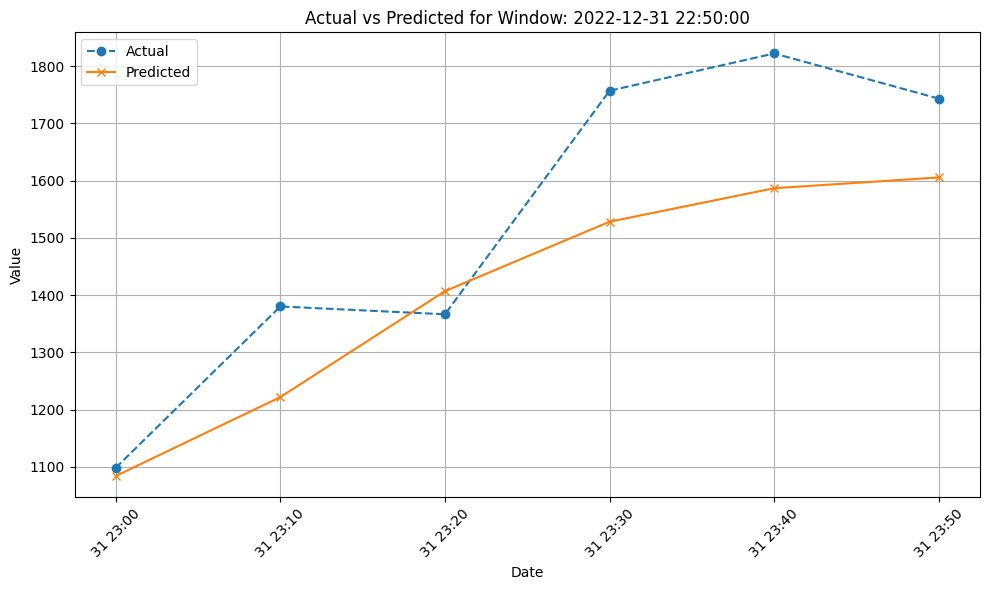

In [32]:
def plot_window_forecast(cv_results, window, model_name='PatchTST'):
    # Filter data for the specific window
    window_data = cv_results[cv_results['cutoff'] == window]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(window_data['ds'], window_data['y'], label='Actual', marker='o', linestyle='--')
    plt.plot(window_data['ds'], window_data[model_name], label='Predicted', marker='x', linestyle='-')

    # Customize the plot
    plt.title(f'Actual vs Predicted for Window: {window}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Adjust layout to prevent cutting off labels
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_window_forecast(insampleResDF, '2022-12-31 22:50:00')

### CNN-LSTM

In [33]:
# Set seeds for reproducibility
seed_value = 42  # Can choose any seed value
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)


In [34]:
# Splitting the data into features and target
X = tsDF.drop(columns=[tarTurbine, '# Date and time'])
y = tsDF[tarTurbine]

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Set the lookback period for sequence creation
lookback = globalSeqLength
forecast_horizon = globalHorizon

def create_sequences(X, y, lookback):
    X_seq, y_seq = [], []
    for i in range(len(X) - lookback - forecast_horizon + 1):
        X_seq.append(X[i:i + lookback])
        y_seq.append(y[i + lookback:i + lookback + forecast_horizon])
    return np.array(X_seq), np.array(y_seq)

# Create sequences
X_seq, y_seq = create_sequences(X_scaled, y, lookback)

# Define cross-validation with Specified number of globalWindows folds
tscv = TimeSeriesSplit(n_splits=globalWindows)

winTestResCNNLSTM = {}

# Initialize lists to hold the results
rmse_scores = []
mae_scores = []
mape_scores = []
r2Score_scores = []

for fold, (train_index, val_index) in enumerate(tscv.split(X_seq)):
    print(f"Training fold {fold+1}...")

    # Split the data into training and validation sets
    X_train, X_val = X_seq[train_index], X_seq[val_index]
    y_train, y_val = y_seq[train_index], y_seq[val_index]

    # Define the CNN-LSTM model
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(lookback, X_train.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(LSTM(100, activation='relu', return_sequences=True, kernel_regularizer='l2'))
    model.add(Dropout(0.3))
    model.add(LSTM(100, activation='relu', kernel_regularizer='l2'))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(forecast_horizon))

    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Define callbacks
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ModelCheckpoint(f'best_model_fold_{fold+1}.keras', monitor='val_loss', save_best_only=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)
    ]

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=callbacks, verbose=1)

    # Predict on the validation set
    y_pred = model.predict(X_val)

    # Calculate metrics for this fold
    y_val_flat = y_val.flatten()
    y_pred_flat = y_pred.flatten()

    # Last Actual & Predicted Forecast Horizon Values from the test set for the Window
    y_val_flat = y_val_flat[-forecast_horizon:]
    y_pred_flat = y_pred_flat[-forecast_horizon:]

    winTestResCNNLSTM[fold+1] = y_val_flat, y_pred_flat

    rmse, mae, mape, r2Score = getScore(y_val_flat, y_pred_flat)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    mape_scores.append(mape)
    r2Score_scores.append(r2Score)

    # break

Training fold 1...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 147247.1406 - val_loss: 126065.4297 - learning_rate: 0.0010
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 87522.1484 - val_loss: 61498.7070 - learning_rate: 0.0010
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 55138.8906 - val_loss: 57886.9766 - learning_rate: 0.0010
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 44572.6211 - val_loss: 54177.5430 - learning_rate: 0.0010
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 44419.6523 - val_loss: 53392.8750 - learning_rate: 0.0010
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 41491.6719 - val_loss: 54080.8477 - learning_rate: 0.0010
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 44919.2969 - val_loss: 58875.2656 - learning_rate: 0.0010
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 43858.0234 - val_loss: 52892.4219 - learning_rate: 0.0010
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 42

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 120983.4531 - val_loss: 25211.2207 - learning_rate: 0.0010
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 54621.0195 - val_loss: 15541.2422 - learning_rate: 0.0010
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 47918.2266 - val_loss: 18593.7852 - learning_rate: 0.0010
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - loss: 48488.6445 - val_loss: 20244.8125 - learning_rate: 0.0010
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 50114.9297 - val_loss: 20131.0195 - learning_rate: 0.0010
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 49703.2812 - val_loss: 19313.1602 - learning_rate: 0.0010
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 47071.5039 - val_loss: 18416.1621 - learning_rate: 0.0010
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 46461.1797 - val_loss: 15064.6250 - learning_rate: 5.0000e-04
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 88612.4609 - val_loss: 114371.3047 - learning_rate: 0.0010
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 36129.8008 - val_loss: 134853.6094 - learning_rate: 0.0010
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 34703.1914 - val_loss: 142848.3125 - learning_rate: 0.0010
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 31830.6406 - val_loss: 133928.9688 - learning_rate: 0.0010
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 31745.4785 - val_loss: 142328.6406 - learning_rate: 0.0010
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 30028.8555 - val_loss: 123064.0469 - learning_rate: 0.0010
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 29596.5312 - val_loss: 111563.2656 - learning_rate: 5.0000e-04
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 27282.0352 - val_loss: 106371.0781 - learning_rate: 5.0000e-04
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 124779.0781 - val_loss: 172957.8594 - learning_rate: 0.0010
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 56096.6055 - val_loss: 243984.0312 - learning_rate: 0.0010
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 50799.4023 - val_loss: 162822.0938 - learning_rate: 0.0010
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 46744.3594 - val_loss: 207355.0625 - learning_rate: 0.0010
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 46810.2344 - val_loss: 204188.5625 - learning_rate: 0.0010
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 43692.7695 - val_loss: 163520.4688 - learning_rate: 0.0010
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 42585.5703 - val_loss: 111136.2656 - learning_rate: 0.0010
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 61976.3164 - val_loss: 184071.5781 - learning_rate: 0.0010
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 251622.4062 - val_loss: 318926.9688 - learning_rate: 0.0010
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 100816.6797 - val_loss: 324542.8438 - learning_rate: 0.0010
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 79654.7031 - val_loss: 297268.3438 - learning_rate: 0.0010
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 87487.2891 - val_loss: 301261.5312 - learning_rate: 0.0010
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 73198.7969 - val_loss: 319891.6562 - learning_rate: 0.0010
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - loss: 67719.0625 - val_loss: 285321.5625 - learning_rate: 0.0010
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - loss: 70177.7969 - val_loss: 319548.5938 - learning_rate: 0.0010
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - loss: 63747.3477 - val_loss: 269856.2812 - learning_rate: 0.0010
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - loss: 6182

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - loss: 324233.1875 - val_loss: 487462.4375 - learning_rate: 0.0010
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - loss: 140553.9844 - val_loss: 374243.2812 - learning_rate: 0.0010
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 120344.0469 - val_loss: 439999.9062 - learning_rate: 0.0010
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 110661.5156 - val_loss: 310112.1875 - learning_rate: 0.0010
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 109020.8672 - val_loss: 295773.5312 - learning_rate: 0.0010
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - loss: 95772.5859 - val_loss: 260630.2812 - learning_rate: 0.0010
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 14s 109ms/step - loss: 91574.3516 - val_loss: 304545.2188 - learning_rate: 0.0010
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - loss: 83086.5703 - val_loss: 258526.4531 - learning_rate: 0.0010
Epoch 9/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 1

In [35]:
# Display the average scores across all folds
print(f"\n\nAverage RMSE: {np.mean(rmse_scores)}")
print(f"Average MAE: {np.mean(mae_scores)}")
print(f"Average MAPE: {np.mean(mape_scores)}")
print(f"Average R2-Score: {np.mean(r2Score_scores)}")

modelScores['CNN-LSTM'] = {"RMSE": rmse_scores, "MAE": mae_scores, "MAPE": mape_scores, "R2": r2Score_scores}



Average RMSE: 260.9809397339614
Average MAE: 230.26675476928168
Average MAPE: 0.6160094677068794
Average R2-Score: -17.248491808346923


#### Visualizse Actual vs Pred for Specified Window/Fold

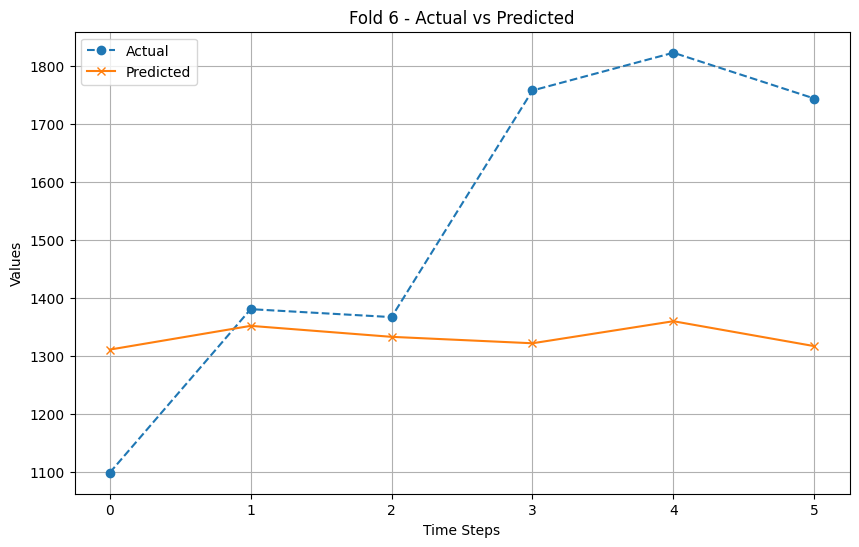

In [36]:
def plot_actual_vs_pred(fold_data, fold_number):
    """
    Plots the actual vs predicted values for a specified fold number.

    Parameters:
    - fold_data: A dictionary where each key is a fold number, and each value is a tuple containing
                 the actual values (array) and the predicted values (array).
    - fold_number: The fold number to plot.
    """
    # Check if the fold number exists in the data
    if fold_number not in fold_data:
        print(f"Fold {fold_number} not found in the data.")
        return

    # Extract actual and predicted values
    actual_values, predicted_values = fold_data[fold_number]

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(actual_values, label='Actual', marker='o', linestyle='--')
    plt.plot(predicted_values, label='Predicted', marker='x', linestyle='-')
    plt.title(f'Fold {fold_number} - Actual vs Predicted')
    plt.xlabel('Time Steps')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_actual_vs_pred(winTestResCNNLSTM, 6)

#### Generate Future Forecast for CNN-LSTM

In [37]:
# Take the last 'lookback' rows from the dataset
X_last =  tsDF.drop(columns=[tarTurbine, '# Date and time']).tail(lookback).values

# Scale the features
X_last_scaled = scaler.transform(X_last)

# Reshape to match the input shape expected by the model (1 sample, lookback, number of features)
X_last_scaled = X_last_scaled.reshape(1, lookback, X_last_scaled.shape[1])

# Load Best Model
bestCNNLSTMModel = load_model("best_model_fold_6.keras")

# Use the trained model to predict the next time steps
y_future_pred = bestCNNLSTMModel.predict(X_last_scaled)

forecastDF['CNN-LSTM'] = y_future_pred[0]

# Display the predicted values for the next time steps
print("Predicted values for the next 6 time steps:")
print(y_future_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
Predicted values for the next 6 time steps:
[[1457.3054 1509.4006 1488.9867 1474.3666 1515.401  1466.1128]]


## InSample & Out of Sample Visualization

### InSample Score Visualization

In [ ]:
def plot_model_scores_stacked_bar(modelScores, metric):
    """
    Plots the specified metric for both models across all folds using a stacked bar chart.

    Parameters:
    - modelScores: Dictionary containing model scores.
    - metric: The metric to plot (e.g., 'RMSE', 'MAE', 'MAPE', 'R2').

    Returns:
    - None: The function displays a stacked bar chart.
    """
    if metric not in ['RMSE', 'MAE', 'MAPE', 'R2']:
        print(f"Metric '{metric}' is not recognized. Choose from 'RMSE', 'MAE', 'MAPE', 'R2'.")
        return

    # Extract data
    patchtst_scores = modelScores['PatchTST'][metric]
    cnn_lstm_scores = modelScores['CNN-LSTM'][metric]

    # Number of folds
    folds = list(range(1, len(patchtst_scores) + 1))

    # Plot the stacked bar chart
    plt.figure(figsize=(10, 6))
    bar_width = 0.5
    p1 = plt.bar(folds, patchtst_scores, bar_width, label='PatchTST', color='blue')
    p2 = plt.bar(folds, cnn_lstm_scores, bar_width, bottom=patchtst_scores, label='CNN-LSTM', color='orange')

    plt.title(f'{metric} Across Folds')
    plt.xlabel('Fold Number')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True, axis='y')
    plt.xticks(folds)
    plt.tight_layout()
    plt.show()

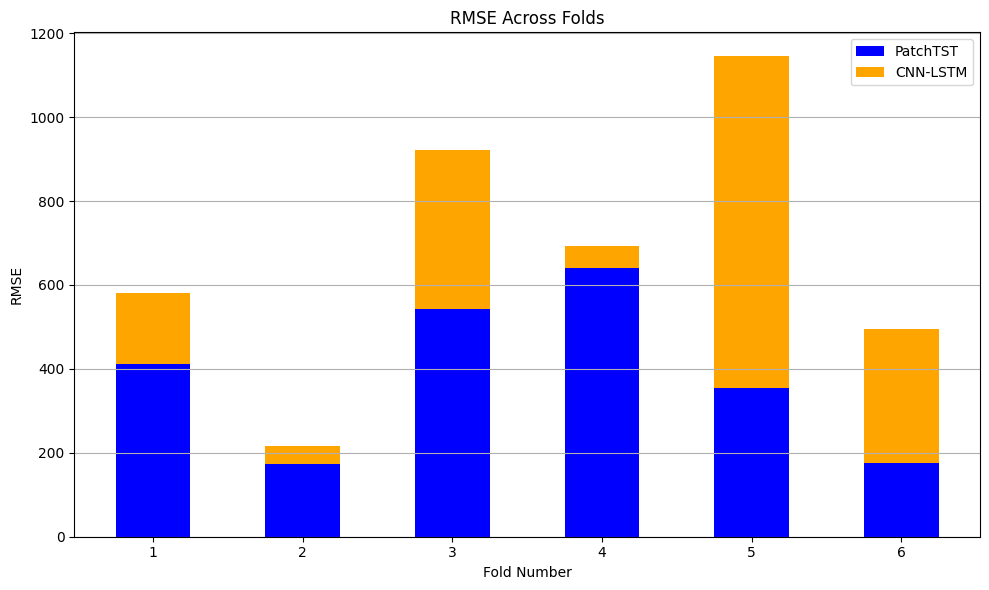

In [ ]:
plot_model_scores_stacked_bar(modelScores, 'RMSE')

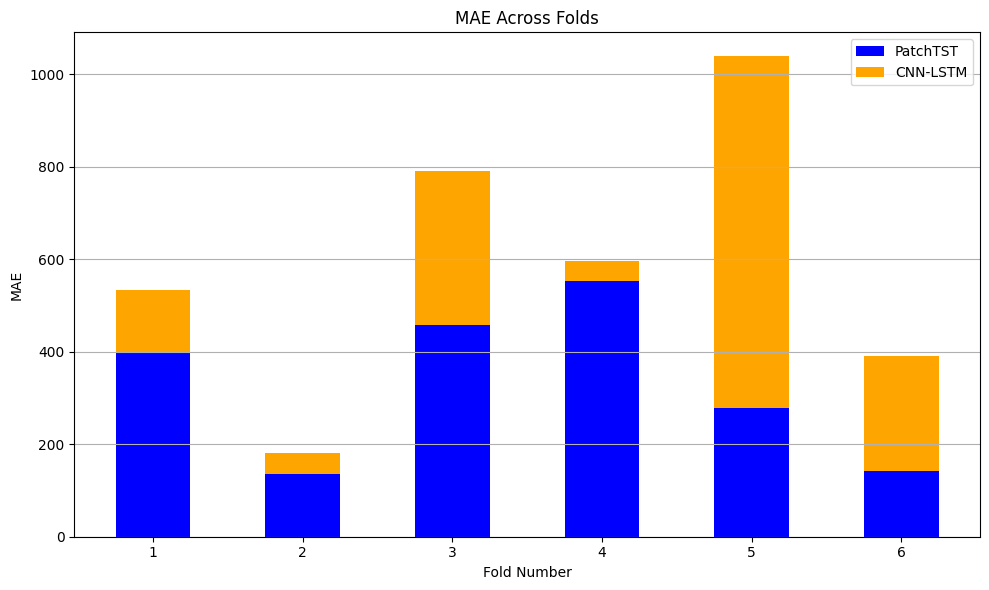

In [ ]:
plot_model_scores_stacked_bar(modelScores, 'MAE')

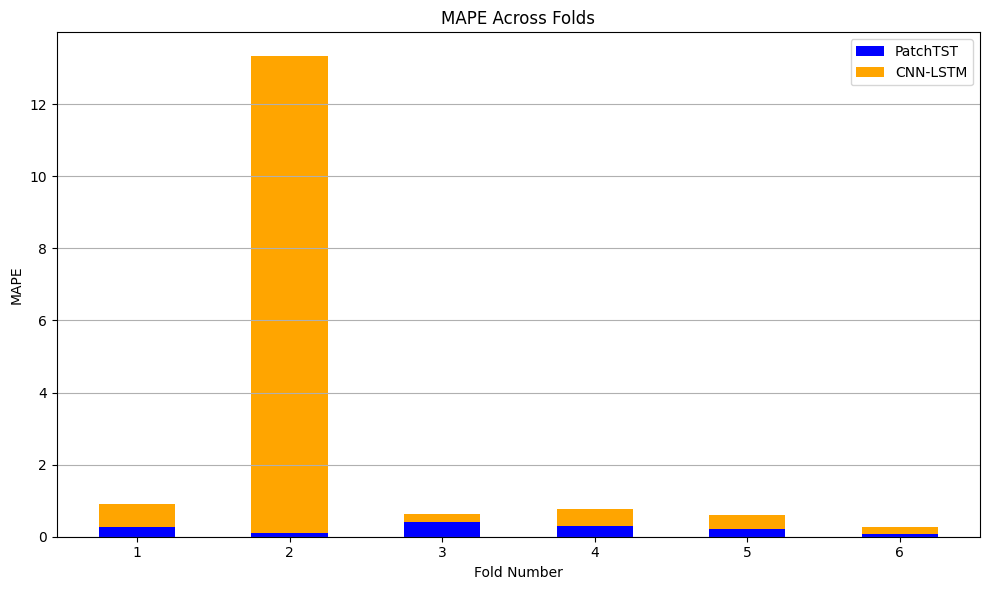

In [ ]:
plot_model_scores_stacked_bar(modelScores, 'MAPE')

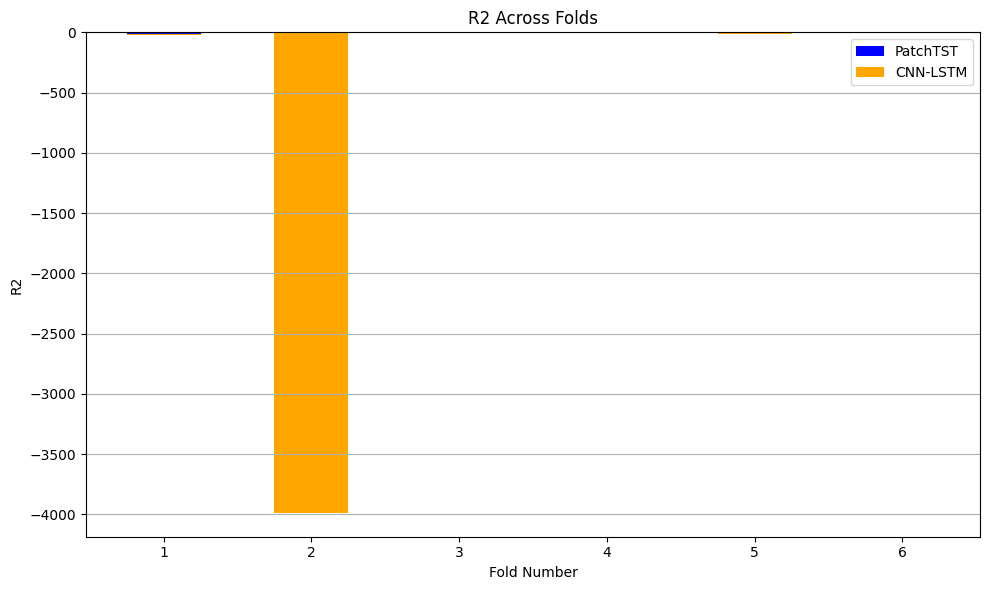

In [ ]:
plot_model_scores_stacked_bar(modelScores, 'R2')

### Future Forecast Visualization

In [ ]:
forecastDF.reset_index(drop=True)

ds     PatchTST     CNN-LSTM
0 2023-01-01 00:00:00  1697.251831  1565.239868
1 2023-01-01 00:10:00  1691.468506  1548.405884
2 2023-01-01 00:20:00  1750.984619  1549.145874
3 2023-01-01 00:30:00  1635.512207  1553.361938
4 2023-01-01 00:40:00  1563.558838  1543.096558
5 2023-01-01 00:50:00  1496.506226  1560.219727

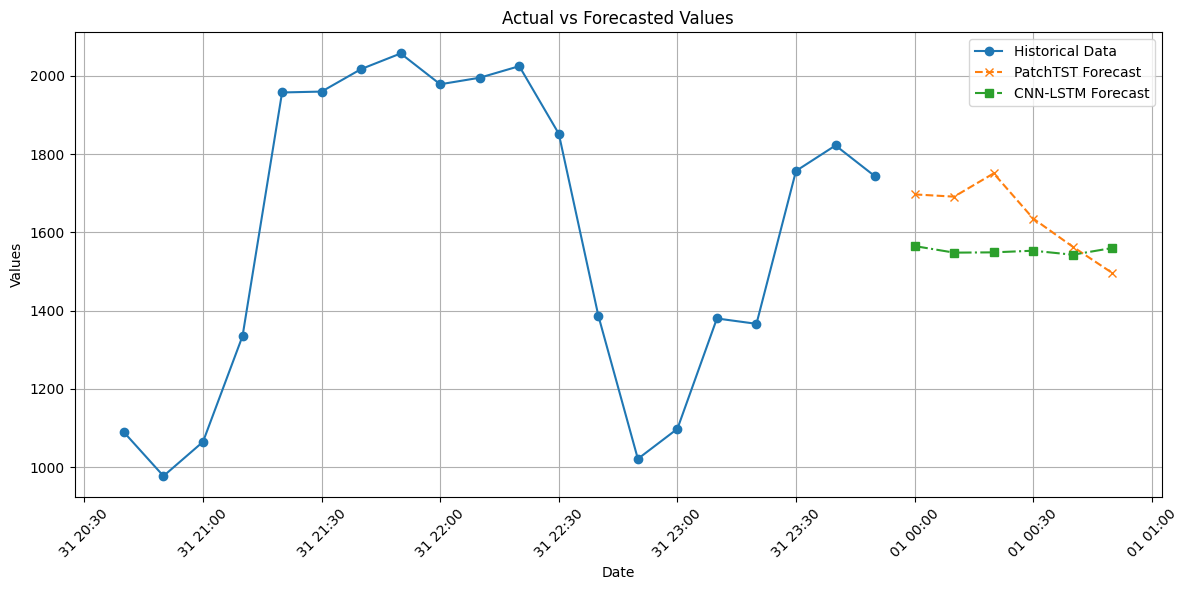

In [ ]:
def plot_combined_forecast(histDF, forecastDF, num_rows):
    """
    Combines the last specified number of rows from the historical dataset with the forecasted data
    and plots the actual vs forecasted values from two models.

    Parameters:
    - histDF: DataFrame containing historical data with columns ['ds', 'actualPastData'].
    - forecastDF: DataFrame containing forecasted data with columns ['ds', 'PatchTST', 'CNN-LSTM'].
    - num_rows: The number of rows to select from the historical data.

    Returns:
    - None: The function displays a line chart.
    """

    histDF = histDF.rename(columns={'# Date and time': 'ds'})

    # Select the last num_rows from the historical data
    histDF_selected = histDF.tail(num_rows)

    # Combine historical data with forecast data
    combinedDF = pd.concat([histDF_selected, forecastDF], ignore_index=True)

    # Plot the actual vs forecasted values
    plt.figure(figsize=(12, 6))
    plt.plot(combinedDF['ds'], combinedDF[tarTurbine], label='Historical Data', marker='o', linestyle='-')
    plt.plot(combinedDF['ds'], combinedDF['PatchTST'], label='PatchTST Forecast', marker='x', linestyle='--')
    plt.plot(combinedDF['ds'], combinedDF['CNN-LSTM'], label='CNN-LSTM Forecast', marker='s', linestyle='-.')

    plt.title('Actual vs Forecasted Values')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

histDF = tsDF[['# Date and time', tarTurbine]]

# Plotting the combined data with the last 4 rows of historical data
plot_combined_forecast(histDF, forecastDF, num_rows=20)